In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pdb
from PIL import Image
import heapq
import PIL

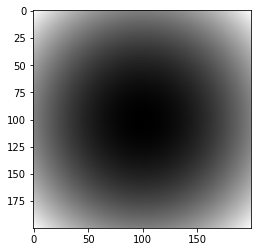

In [16]:
image = np.zeros((200, 200))


#create a image where the center is dark and the edges are light, but it's a circle
for i in range(200):
    for j in range(200):
        image[i,j] = (i-100)**2 + (j-100)**2

        
        
plt.imshow(image, cmap='gray')

#save image to a file
plt.imsave('test.png', image, cmap='gray')


In [3]:
def get_neighbors(i,j,image):
    neighbors = []
    xmin = 0
    xmax = len(image[0])
    ymin = 0
    ymax = len(image)

    if i > 0:
        neighbors.append((i-1,j))
    if i < xmax-1:
        neighbors.append((i+1,j))
    if j > 0:
        neighbors.append((i,j-1))
    if j < ymax-1:
        neighbors.append((i,j+1))
    if i > 0 and j > 0:
        neighbors.append((i-1,j-1))
    if i > 0 and j < ymax-1:
        neighbors.append((i-1,j+1))
    if i < xmax-1 and j > 0:
        neighbors.append((i+1,j-1))
    if i < xmax-1 and j < ymax-1:
        neighbors.append((i+1,j+1))
        
    return neighbors


3937
(67, 59)


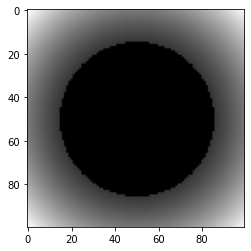

In [13]:
def get_initial_threshold(x,y,image):
    neighbors = get_neighbors(x,y,image)
    neighbors = [image[x[0],x[1]] for x in neighbors]
    return np.median(neighbors)

def level_trace(x,y,image, threshold):
    visited = set()
    visited.add((x,y))
    to_visit = set()
    og_value = image[x,y]
    start = (x,y)
    curr_pixel = (x,y)

    i = 0
    while True:
        neighbors = get_neighbors(curr_pixel[0],curr_pixel[1],image)
        neighbors = [x for x in neighbors if x not in visited]
        to_visit.update([neighbor for neighbor in neighbors if image[neighbor] < threshold])
        
        if len(to_visit) == 0:
            break
        else: 
            curr_pixel = to_visit.pop()
            visited.add(curr_pixel)
        i +=1
        
    return visited

image = np.zeros((100, 100))

#create a image where the center is dark and the edges are light, but it's a circle
for i in range(100):
    for j in range(100):
        image[i,j] = (i-50)**2 + (j-50)**2


threshold = get_initial_threshold(25,25,image)

out = level_trace(25,25,image,threshold)
print(len(out))
print(out.pop())
for i in out:
    image[i] = 255


plt.imshow(image, cmap='gray')

9
(26, 24)


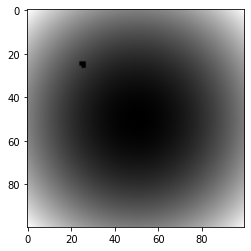

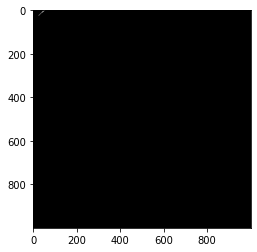